<a href="https://colab.research.google.com/github/lfr4704/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LR_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


#create/clean dataframe

In [0]:
#import 
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
#get data

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-02-04 00:48:50--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.2’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2020-02-04 00:48:51 (129 KB/s) - ‘house-votes-84.data.2’ saved [18171/18171]



In [0]:
# make into a dataframe
column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

votes_df = pd.read_csv('house-votes-84.data', header=None, names = column_headers, na_values ="?")                         

In [0]:
votes_df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [0]:
#recode the votes as numberic
votes_df = votes_df.replace({'y': 1, 'n': 0})
votes_df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


#1. Generate and numerically represent a confidence interval

In [0]:
#create function to numerically get confidence interval 
#data is any column in your data frame e.i. votes_df['water-project']
def confidence_interval(data, confidence =0.95):
  """
    Calculate a confidence interval around a sample mean for given data.
    Using t-distribution and two-tailed test, default 95% confidence. 

    Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval

    Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = data
  mean = data.mean()
  n = len(data)
  stderr = np.std(data, ddof=1)/np.sqrt(n)
  moe = stderr * stats.t.ppf((1+ confidence) / 2.0, n-1)
  return (mean, mean - moe, mean + moe)

In [0]:
#mean of water project including both dem and reps
votes_df['water-project'].mean()

0.5038759689922481

In [0]:
#call the function 
confidence_interval(votes_df['water-project'])

(0.5038759689922481, 0.45669845349141763, 0.5510534844930786)

#2. Graphically (with a plot) represent the confidence interval

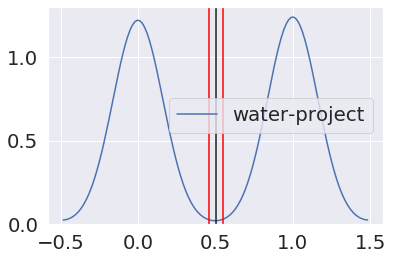

In [0]:

#set the lines
CI = confidence_interval(votes_df['water-project'])

#use dropna to remove errors from plot
sns.kdeplot(votes_df['water-project'].dropna());

#plot interval lines and mean 
plt.axvline(x=CI[1], color = 'red')
plt.axvline(x=CI[2], color = 'red')
plt.axvline(x=CI[0], color = 'k');

#3. Interpret the confidence interval - what does it tell you about the data and its distribution?

Just like in the example described in the assignment introduction of the assignement. In this case, the confidence interval includes  0.5  - which is the natural null hypothesis  So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

#4. Take a dataset that we have used in the past in class that has categorical variables. Pick two of those categorical variables and run a chi-squared tests on that data:


*   By hand using Numpy
*   In a single line using Scipy






In [0]:
#using the population an example from a previous class
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
df.shape

(32561, 15)

In [0]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [0]:
#does dataframe has null values?
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

In [0]:
#dropping na values
df= df.dropna()

In [0]:
#check nan numbers have been reoved
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [0]:
df.shape

(30162, 15)

In [0]:
df['education'].value_counts()

 HS-grad         9840
 Some-college    6678
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64

In [0]:
df['education-num'].value_counts()

9     9840
10    6678
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: education-num, dtype: int64

In [0]:
# create some binned categories 
cut_points = [0,4,8,9,10,13,16]
label_names = ['Primary', 'Some High School', 'High School Grad', "Some College", "Bachelors", "Highly Educated"]
df['education_categories'] = pd.cut(df['education-num'], cut_points, labels=label_names)

df['education_categories'].value_counts()

High School Grad    9840
Bachelors           7359
Some College        6678
Some High School    2700
Highly Educated     2544
Primary             1041
Name: education_categories, dtype: int64

In [0]:
#create crosstab of education and relationship
contingency_table= pd.crosstab(df['education_categories'], df['relationship'], margins=True)
df.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,education_categories
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Bachelors
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Bachelors
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,High School Grad
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Some High School
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Bachelors
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,Highly Educated
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,Some High School
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,High School Grad
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,Highly Educated
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,Bachelors


In [0]:
#create counts
primary_count = contingency_table.iloc[0][0:6]
primary_count

relationship
 Husband           493
 Not-in-family     232
 Other-relative     89
 Own-child          71
 Unmarried         123
 Wife               33
Name: Primary, dtype: int64

In [0]:

somehs_count = contingency_table.iloc[1][0:6]
somehs_count

relationship
 Husband           866
 Not-in-family     546
 Other-relative    136
 Own-child         750
 Unmarried         321
 Wife               81
Name: Some High School, dtype: int64

In [0]:

hs_count = contingency_table.iloc[2][0:6]
hs_count

relationship
 Husband           4058
 Not-in-family     2351
 Other-relative     354
 Own-child         1397
 Unmarried         1227
 Wife               453
Name: High School Grad, dtype: int64

In [0]:
somecollege_count = contingency_table.iloc[3][0:6]
somecollege_count

relationship
 Husband           2368
 Not-in-family     1690
 Other-relative     181
 Own-child         1424
 Unmarried          738
 Wife               277
Name: Some College, dtype: int64

In [0]:
bs_count = contingency_table.iloc[4][0:6]
bs_count

relationship
 Husband           3248
 Not-in-family     2211
 Other-relative     114
 Own-child          749
 Unmarried          624
 Wife               413
Name: Bachelors, dtype: int64

In [0]:
he_count = contingency_table.iloc[5][0:6]
he_count

relationship
 Husband           1430
 Not-in-family      696
 Other-relative      15
 Own-child           75
 Unmarried          179
 Wife               149
Name: Highly Educated, dtype: int64

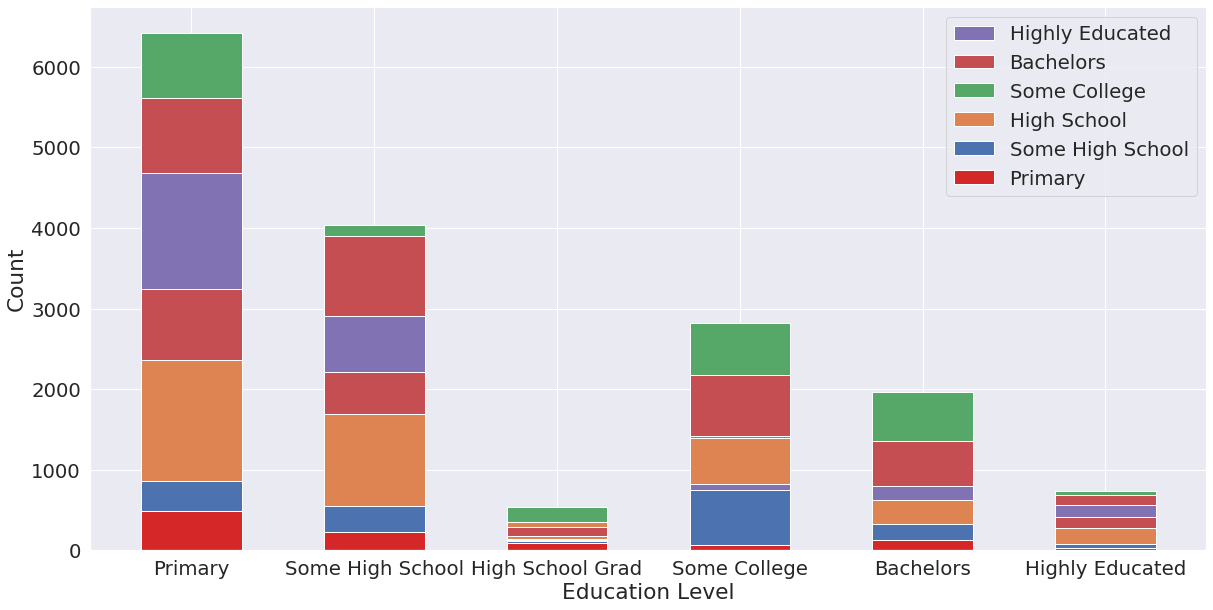

In [0]:
#Plot the bar chart 
fig = plt.figure(figsize=(20, 10))
sns.set(font_scale=1.8)
categories = ['Primary', 'Some High School', 'High School Grad', "Some College", "Bachelors", "Highly Educated"]
p1 = plt.bar(categories, primary_count, 0.55, color='#d62728')
p2 = plt.bar(categories, somehs_count, 0.55, bottom=primary_count)
p3 = plt.bar(categories, hs_count, 0.55, bottom=somehs_count)
p4 = plt.bar(categories, somecollege_count, 0.55, bottom=hs_count)
p5 = plt.bar(categories, bs_count, 0.55, bottom=somecollege_count)
p6 = plt.bar(categories, he_count, 0.55, bottom=bs_count)
plt.legend((p6[0],p5[0],p4[0],p3[0], p2[0], p1[0]), ('Highly Educated','Bachelors','Some College','High School','Some High School', 'Primary'))
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

In [0]:
#expected value calcuation
# [rows, columns] and the number after the ":" is not included.
row_sums = contingency_table.iloc[0:6, 6].values
col_sums = contingency_table.iloc[6, 0:6].values

print(row_sums)
print(col_sums)

[1041 2700 9840 6678 7359 2544]
[12463  7726   889  4466  3212  1406]


In [0]:
total = contingency_table.loc['All', 'All']
total

30162

In [0]:
expected = []
for i in range(len(row_sums)):
    expected_row = []
    for column in col_sums:
        expected_val = column*row_sums[i]/total
        expected_row.append(expected_val)
    expected.append(expected_row)
    
expected = np.array(expected)
print(expected.shape)  
print(expected)

(6, 6)
[[ 430.14332604  266.6522777    30.68261389  154.13785558  110.85776805
    48.52615874]
 [1115.64551422  691.60533121   79.58026656  399.78118162  287.5273523
   125.86035409]
 [4065.90809628 2520.51720708  290.02586035 1456.98030635 1047.87746171
   458.69106823]
 [2759.36323851 1710.5705192   196.82852596  988.79212254  711.15098468
   311.29460911]
 [3040.75382932 1885.00875274  216.90043764 1089.62582057  783.67177243
   343.03938731]
 [1051.18599562  651.64591207   74.9822956   376.68271335  270.91466083
   118.58842252]]


In [0]:
observed = pd.crosstab(df['education_categories'], df['relationship']).values
print(observed.shape)
observed

(6, 6)


array([[ 493,  232,   89,   71,  123,   33],
       [ 866,  546,  136,  750,  321,   81],
       [4058, 2351,  354, 1397, 1227,  453],
       [2368, 1690,  181, 1424,  738,  277],
       [3248, 2211,  114,  749,  624,  413],
       [1430,  696,   15,   75,  179,  149]])

In [0]:
#get chi-squared statistic with Numpy
# Array broadcasting will work with numpy arrays but not python lists
chi_squared = ((observed - expected)**2/(expected)).sum() 
print(f"Chi-Squared: {chi_squared}")

Chi-Squared: 1681.648852838484


In [0]:
# Degrees of Freedom of a Chi-squared test

#degrees_of_freedom = (num_rows - 1)(num_columns - 1)


# Calculate Degrees of Freedom
dof = (len(row_sums)-1)*(len(col_sums)-1)
print(f"Degrees of Freedom: {dof}")

Degrees of Freedom: 25


In [0]:
#run a chi-square using Scipy
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 1681.648852838484
P-value: 0.0
Degrees of Freedom: 25
Expected: 
 [[ 430.14332604  266.6522777    30.68261389  154.13785558  110.85776805
    48.52615874]
 [1115.64551422  691.60533121   79.58026656  399.78118162  287.5273523
   125.86035409]
 [4065.90809628 2520.51720708  290.02586035 1456.98030635 1047.87746171
   458.69106823]
 [2759.36323851 1710.5705192   196.82852596  988.79212254  711.15098468
   311.29460911]
 [3040.75382932 1885.00875274  216.90043764 1089.62582057  783.67177243
   343.03938731]
 [1051.18599562  651.64591207   74.9822956   376.68271335  270.91466083
   118.58842252]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)